# Quantum Teleportation Algorithm

Quantum teleportation is a technique for transferring quantum information from a sender at one location to a receiver some distance away. An important note is that the sender knows neither the location of the recipient nor the quantum state that will be transferred. Also, Quantum teleportation only transfers quantum information and not the actual qubit.

We would illustrate quantum teleportation by sending quantum information between Alice(Sender) and Bob(Receiver)

In [1]:
from qiskit import QuantumCircuit, Aer, execute, QuantumRegister, ClassicalRegister
from qiskit_textbook.tools import array_to_latex
from qiskit.visualization import plot_histogram

Create a quantum circuit with 3 qubits - q0, q1, q2.

q0 = Quantum state of q0 would be transferred by Alice to Bob.

q1, q2 = Two entangled qubits, One qubit(q0) be shared with Alice and another qubit(q1) would be shared with Bob.

In [2]:
qr = QuantumRegister(3, name="q")
c0 = ClassicalRegister(1, name="c0")
c1 = ClassicalRegister(1, name="c1")
c2 = ClassicalRegister(1, name="c2")

qc_tel = QuantumCircuit(qr, c0, c1, c2)

Prepare q0 state

In [3]:
qc_tel.x(0)
qc_tel.z(0)
qc_tel.barrier()

### Step 1: 
Entangle q1 and q2

In [4]:
qc_tel.h(1)
qc_tel.cx(1, 2)
qc_tel.barrier()

### Step 2: 
Entangle q0 with q1

In [5]:
qc_tel.cx(0, 1)
qc_tel.h(0)
qc_tel.barrier()

### Step 3:
Perform measurement on q0 and q1.
The results would be transferred classically

In [6]:
qc_tel.measure(qr[0], c0)
qc_tel.measure(qr[1], c1)
qc_tel.barrier()

### Step 4:
Bob, who already has the qubit q2 then applies the following gates depending on the state of the classical bits:

00 → Do nothing

01 → Apply X gate

10 → Apply Z gate

11 → Apply ZX gate

(Note that this transfer of information is purely classical.)

In [7]:
qc_tel.x(2).c_if(c1, 1)
qc_tel.z(2).c_if(c0, 1)
qc_tel.barrier()

#### Measure the result and draw the circuit

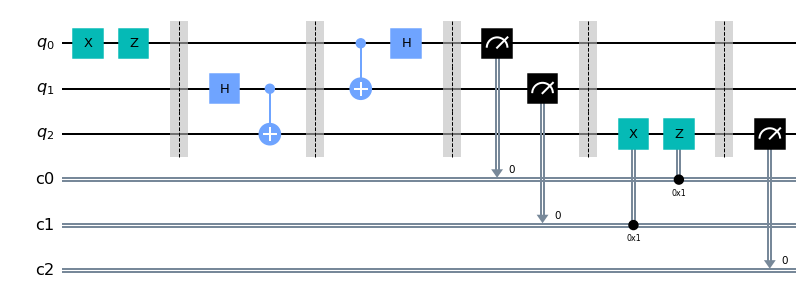

In [8]:
qc_tel.measure(qr[2], c2)
qc_tel.draw('mpl')

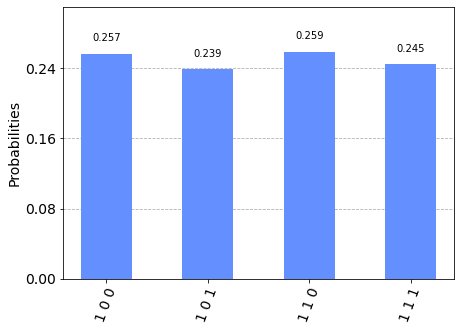

In [9]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc_tel, backend).result()
counts = result.get_counts()
plot_histogram(counts)